let's. let's just get everything that actually goes into the thesis into the same document. I am very disorganized and confused 

hopefully when everything finishes  training I can just "run all" this guy and be done

spoiler alert it wasn't the last batch of results but now this one is. because even if they're a train wreck I won't have time to remake anything, so, for better or worse, this is the last fucking results notebook

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import results as r
import numpy as np
from PIL import Image
import glob
import random

### define stuff, set up

In [2]:
def file_order(fname): #for sorting glob'ed lists of files from output directories to match the file list csv's
    return(int(fname.split('/')[-2]))

def unnorm(og_img, normed_img):
    
    un= normed_img*np.std(og_img)
    un=un+np.mean(og_img)

    #fits_scaled=un/255
    #fits_scaled=fits_scaled*2*2550
    #fits_scaled=fits_scaled-2550
    
    return(un)

def setup(model_name, new=True, south=False):
    location='/home/zenalisa/data/output/last/'+model_name
    #if '1hem' in model_name:
    #    south=True
    #signal=location+'/signal.tiff'
    #target=location+'/target.tiff'
    #prediction=location+'/prediction_smallrun_1131.tiff'

    target_path = location+'/*/target.tiff'
    signal_path = location+'/*/signal.tiff'
    #prediction_path = location+'/*/prediction_'+model_name+'.tiff'
    #print(prediction_path)
    prediction_path= location+'/*/prediction_*.tiff'
    

    target_list = glob.glob(target_path)
    target_list.sort(key=file_order)
    signal_list = glob.glob(signal_path)
    signal_list.sort(key=file_order)
    prediction_list = glob.glob(prediction_path)
    prediction_list.sort(key=file_order)
    print len(prediction_list)
    
    target_list_new=[]
    prediction_list_new=[]
    signal_list_new=[]
    
    if new:
        location_new=location+'/new'
        if south:
            location_new=location+'/south'
        target_path_new = location_new+'/*/target.tiff'
        signal_path_new = location_new+'/*/signal.tiff'
        #prediction_path_new = location_new+'/*/prediction_'+model_name+'.tiff'
        prediction_path_new= location_new+'/*/prediction_*.tiff'

        target_list_new = glob.glob(target_path_new)
        target_list_new.sort(key=file_order)
        signal_list_new = glob.glob(signal_path_new)
        signal_list_new.sort(key=file_order)
        prediction_list_new = glob.glob(prediction_path_new)
        prediction_list_new.sort(key=file_order)
        print(len(prediction_list_new))

    
    return(signal_list, target_list, prediction_list, signal_list_new, target_list_new, prediction_list_new)


def setup2(model_name, new=True):
    #did not really need a whole separate copy of this just to change the pathname for south_only but here we are
    location='/home/zenalisa/data/output/last/south_only_'+model_name.split('_')[1]
    
    #signal=location+'/signal.tiff'
    #target=location+'/target.tiff'
    #prediction=location+'/prediction_smallrun_1131.tiff'

    target_path = location+'/*/target.tiff'
    signal_path = location+'/*/signal.tiff'
    #prediction_path = location+'/*/prediction_'+model_name+'.tiff'
    prediction_path= location+'/*/prediction_*.tiff'
    #print(prediction_path)
    

    target_list = glob.glob(target_path)
    target_list.sort(key=file_order)
    signal_list = glob.glob(signal_path)
    signal_list.sort(key=file_order)
    prediction_list = glob.glob(prediction_path)
    prediction_list.sort(key=file_order)
    print len(prediction_list)
    
    target_list_new=[]
    prediction_list_new=[]
    signal_list_new=[]
    
    if new:
        location_new=location+'/new'
        if south:
            location_new=location+'/south'
        target_path_new = location_new+'/*/target.tiff'
        signal_path_new = location_new+'/*/signal.tiff'
        #prediction_path_new = location_new+'/*/prediction_'+model_name+'.tiff'
        prediction_path_new= location_new+'/*/prediction_*.tiff'

        
        target_list_new = glob.glob(target_path_new)
        target_list_new.sort(key=file_order)
        signal_list_new = glob.glob(signal_path_new)
        signal_list_new.sort(key=file_order)
        prediction_list_new = glob.glob(prediction_path_new)
        prediction_list_new.sort(key=file_order)
        print(len(prediction_list_new))

    
    return(signal_list, target_list, prediction_list, signal_list_new, target_list_new, prediction_list_new)

# some clipped AIA examples

(0, 176)
(78, 233)
(68, 239)
(63, 250)
(0, 196)


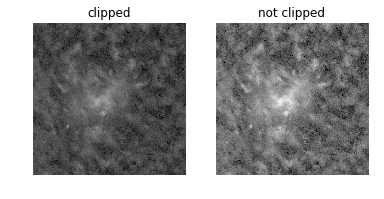

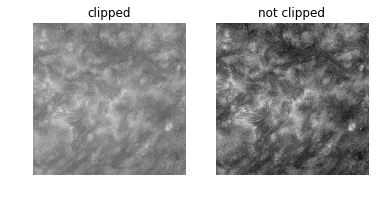

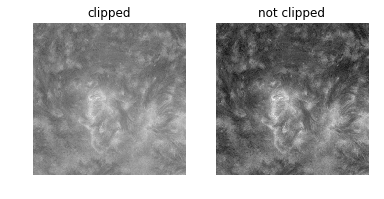

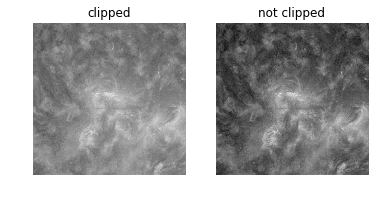

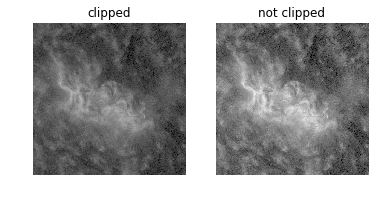

In [17]:
import numpy as np
import random
from astropy.io import fits
from PIL import Image

csv=open('/home/zenalisa/data/10ar_last/lists/test_list_10ar_last_log10abs.csv').readlines()
imgnums=random.sample(range(len(csv)), 5)
for n in imgnums:
    aia=csv[n].split(',')[0].replace('/fs1/project/iip/', '/home/')
    #print(aia)
    
    img=np.array(Image.open(aia))
    print(np.amin(img), np.amax(img))
    plt.figure()
    plt.subplot(121)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.title('clipped')
    plt.axis('off')
    plt.subplot(122)
    plt.imshow(img, cmap='gray')#, vmin=0, vmax=255)
    plt.axis('off')
    plt.title('not clipped');
    

### 10AR

In [5]:
model_name='10ar'
signal_list, target_list, prediction_list, signal_list_new, target_list_new, prediction_list_new = setup(model_name)

500
500


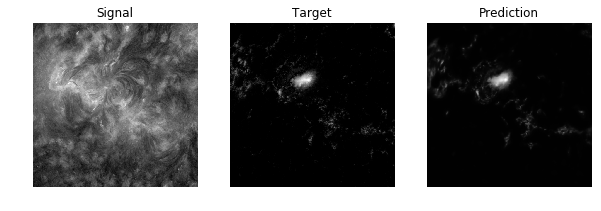

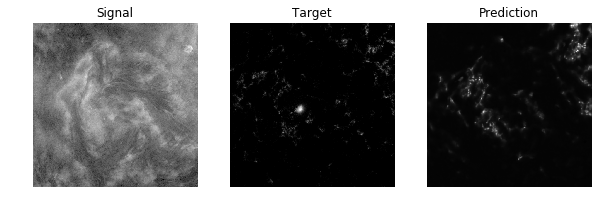

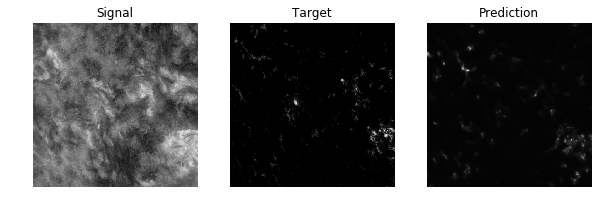

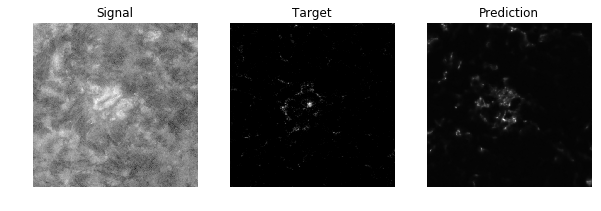

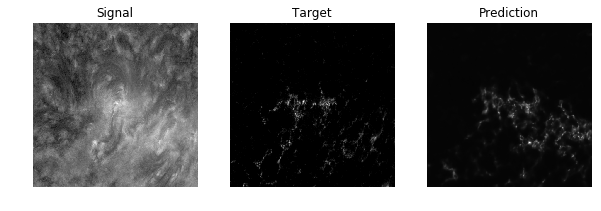

In [9]:
#examples (SameAR)
imgnums=random.sample(range(len(prediction_list)), 5)
for n in imgnums:
    target = target_list[n]
    signal = signal_list[n]
    prediction = prediction_list[n]
    
    plot = r.display(signal, target, prediction)#, '/home/zenalisa/data/fixed_aia_lists/test_list_10ar_210302.csv')
    #break

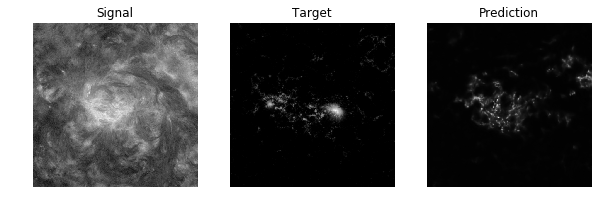

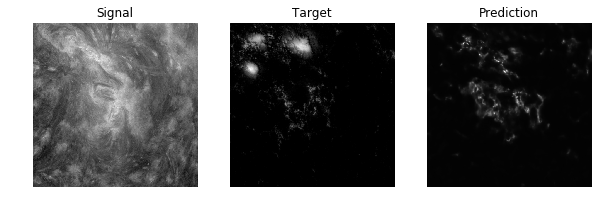

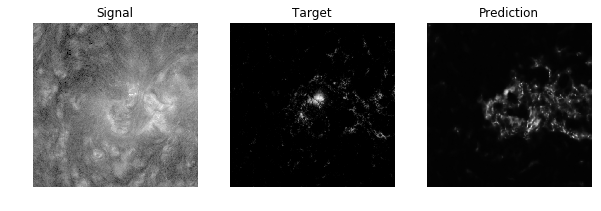

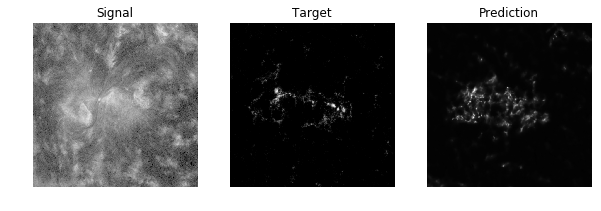

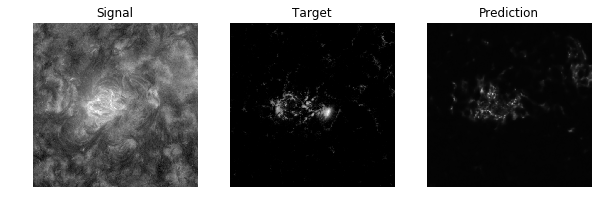

In [10]:
#examples (DiffAR)
imgnums=random.sample(range(len(prediction_list)), 5)
for n in imgnums:    
    target = target_list_new[n]
    signal = signal_list_new[n]
    prediction = prediction_list_new[n]
    plot = r.display(signal, target, prediction)

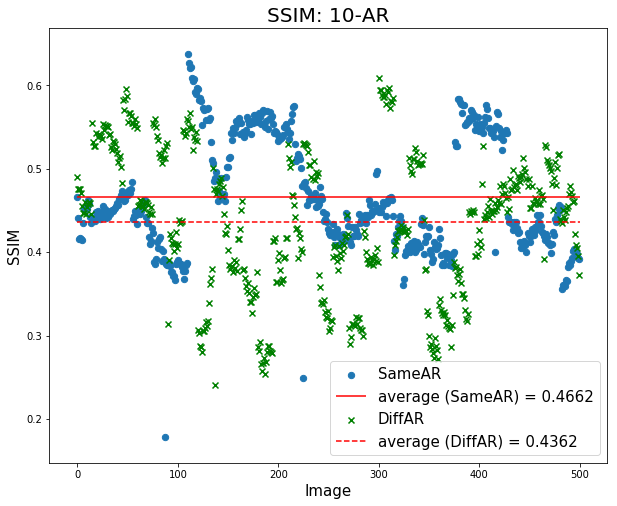

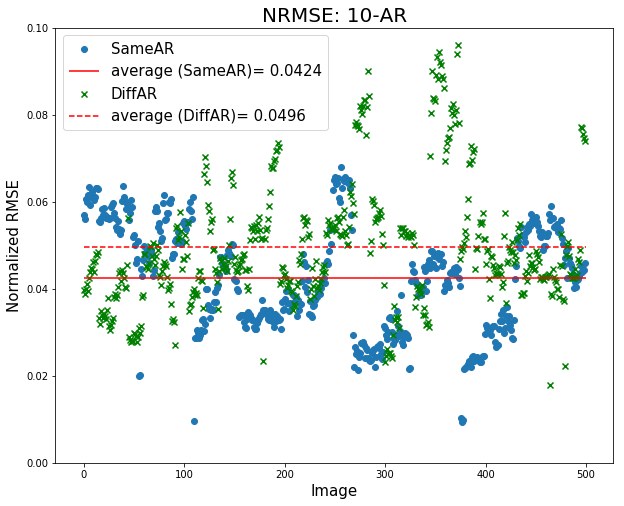

In [48]:
#mse and ssim plots
og_csv1='/home/zenalisa/data/10ar_last/lists/test_list_10ar_last_log10abs.csv'
og_csv2='/home/zenalisa/data/50ar_last/lists/test_list_50ar_last_new_log10abs.csv'

sname='10-AR'
[ssim_neither, mse_neither, ssim_neither_new, mse_neither_new]=r.ssim_mse(target_list, prediction_list, og_csv1, target_list_new, prediction_list_new, og_csv2, simname=sname)


# 52-AR, abs

### log10 AIA

In [3]:
model_name='52log10abs'
signal_list, target_list, prediction_list, signal_list_new, target_list_new, prediction_list_new = setup(model_name)

500
500


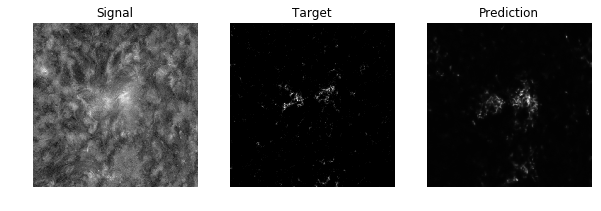

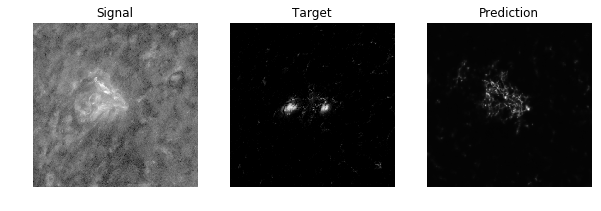

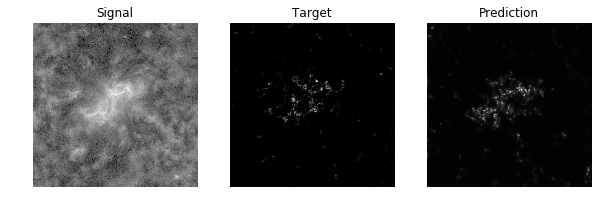

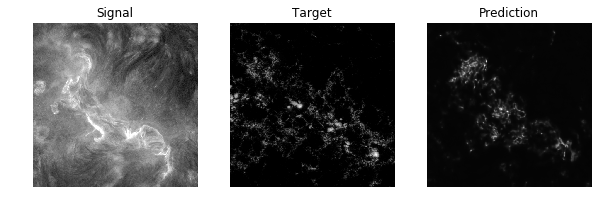

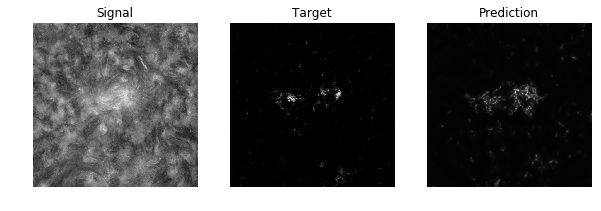

In [9]:
#examples (SameAR)
imgnums=random.sample(range(len(prediction_list)), 5)
for n in imgnums:
    target = target_list[n]
    signal = signal_list[n]
    prediction = prediction_list[n]
    
    plot = r.display(signal, target, prediction)

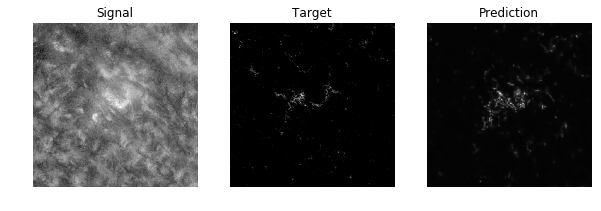

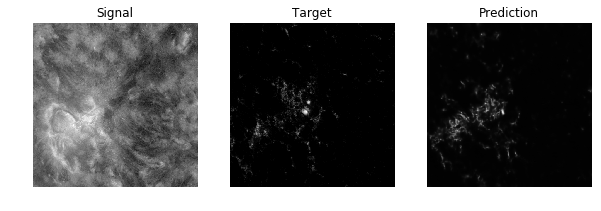

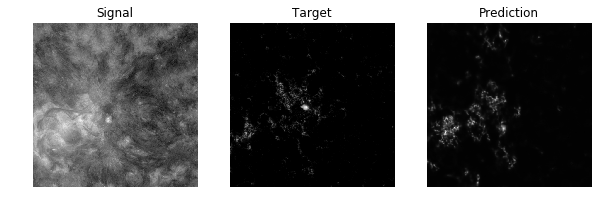

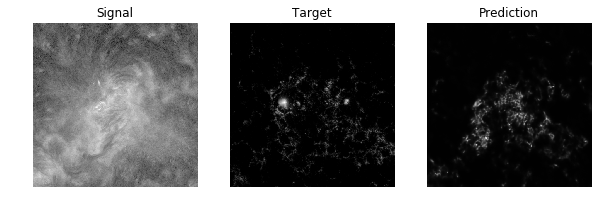

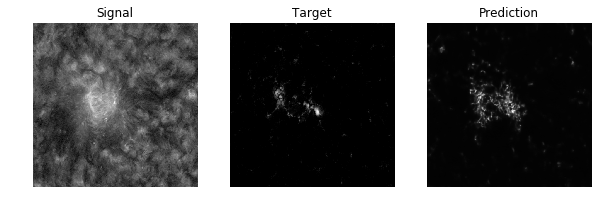

In [9]:
#examples (DiffAR)
imgnums=random.sample(range(len(prediction_list)), 5)
for n in imgnums:    
    target = target_list_new[n]
    signal = signal_list_new[n]
    prediction = prediction_list_new[n]
    plot = r.display(signal, target, prediction)

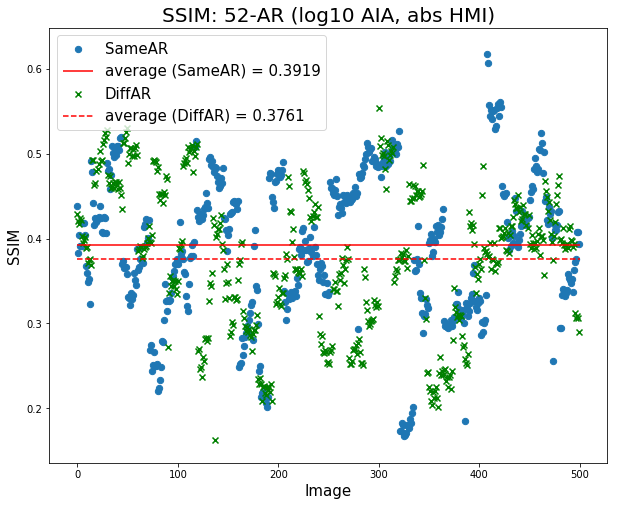

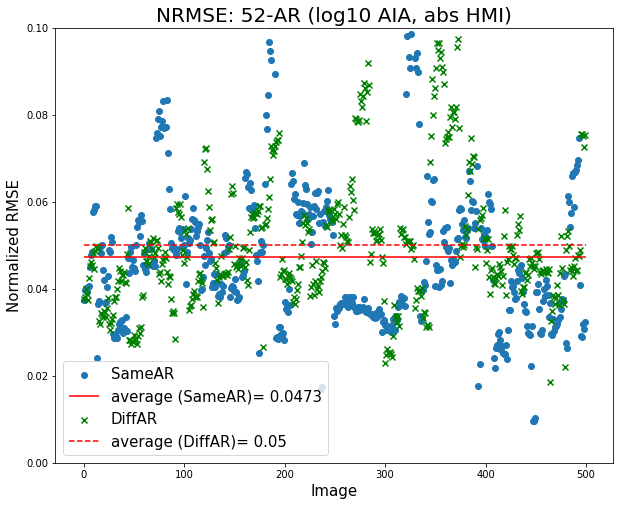

In [4]:
#target_path = '/home/zenalisa/data/output/190604_4/*/target.tiff'
#signal_path = '/home/zenalisa/data/output/190604_4/*/signal.tiff'
#prediction_path = '/home/zenalisa/data/output/190604_4/*/prediction_190604.tiff'
og_csv1='/home/zenalisa/data/50ar_last/lists/abs_lists/test_list_50ar_last_log10abs.csv'
og_csv2='/home/zenalisa/data/50ar_last/lists/abs_lists/test_list_50ar_last_new_log10abs.csv'
#og_csv3='/home/zenalisa/data/test_list_south_only_neither.csv'

sname='52-AR (log10 AIA, abs HMI)'
[ssim_neither, mse_neither, ssim_neither_new, mse_neither_new]=r.ssim_mse(target_list, prediction_list, og_csv1, target_list_new, prediction_list_new, og_csv2, simname=sname)


### linear AIA

In [11]:
model_name='52linabs'
signal_list, target_list, prediction_list, signal_list_new, target_list_new, prediction_list_new = setup(model_name)

498
500


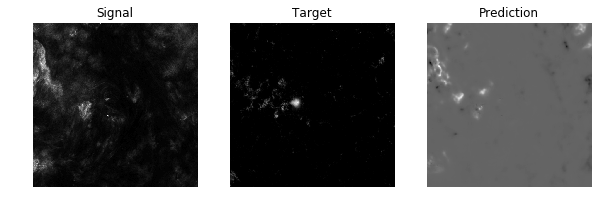

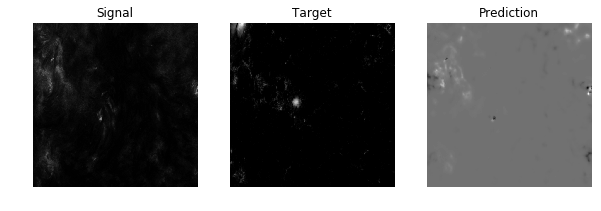

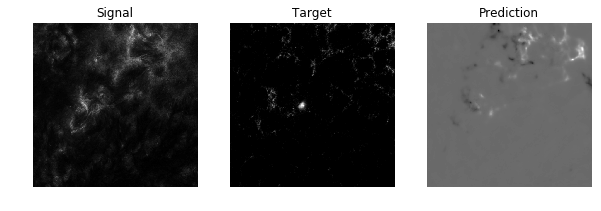

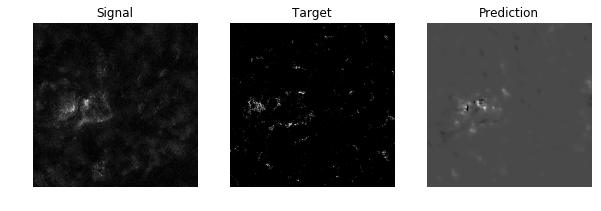

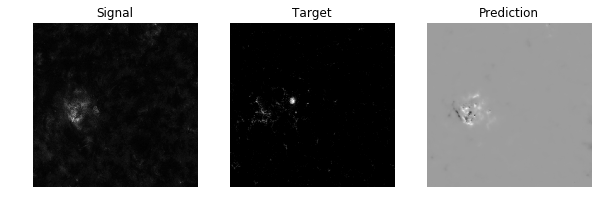

In [12]:
#examples (SameAR)
imgnums=random.sample(range(len(prediction_list)), 5)
for n in imgnums:
    target = target_list[n]
    signal = signal_list[n]
    prediction = prediction_list[n]
    
    plot = r.display(signal, target, prediction)

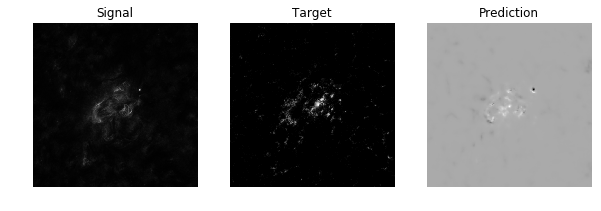

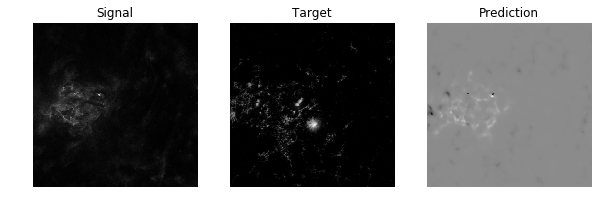

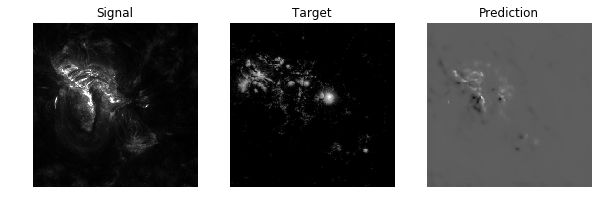

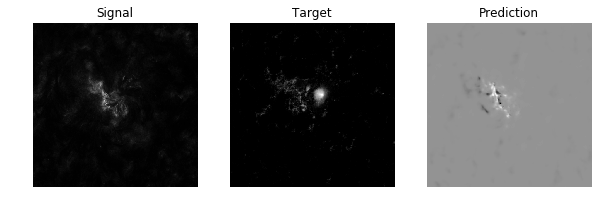

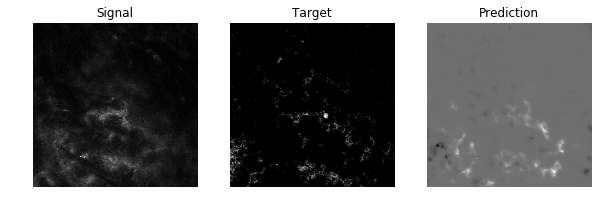

In [13]:
#examples (DiffAR)
imgnums=random.sample(range(len(prediction_list)), 5)
for n in imgnums:    
    target = target_list_new[n]
    signal = signal_list_new[n]
    prediction = prediction_list_new[n]
    plot = r.display(signal, target, prediction)

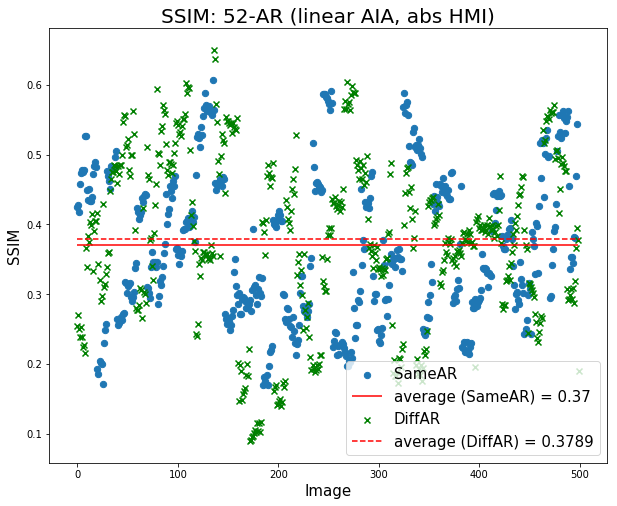

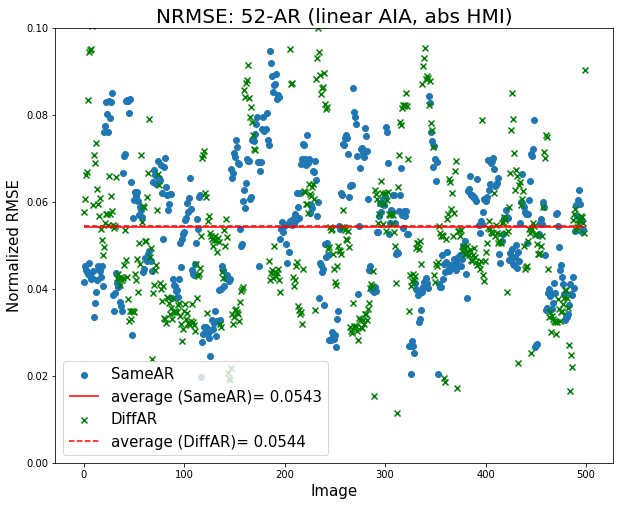

In [14]:
og_csv1='/home/zenalisa/data/50ar_last/test_list_50ar_last_linabs.csv'
og_csv2='/home/zenalisa/data/50ar/test_list_50ar_last_new_linabs.csv'

sname='52-AR (linear AIA, abs HMI)'
[ssim_neither, mse_neither, ssim_neither_new, mse_neither_new]=r.ssim_mse(target_list, prediction_list, og_csv1, target_list_new, prediction_list_new, og_csv2, simname=sname)


# 52AR unbalanced

In [20]:
model_name='52log10signed'
signal_list, target_list, prediction_list, signal_list_new, target_list_new, prediction_list_new = setup(model_name)

500
500


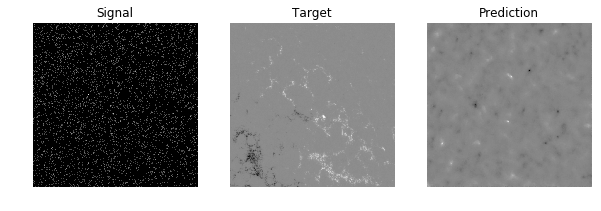

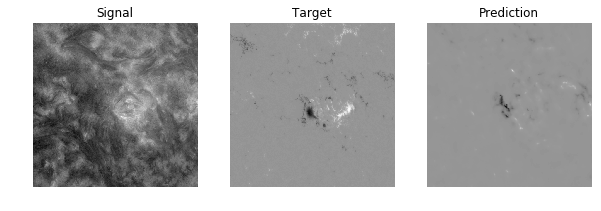

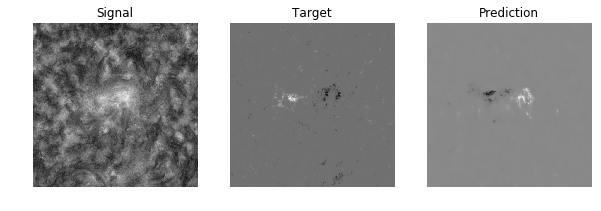

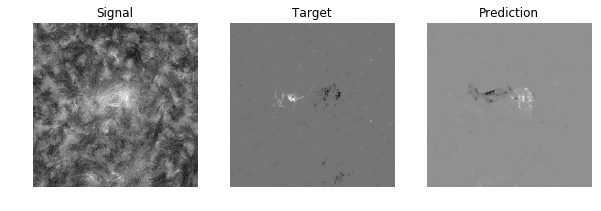

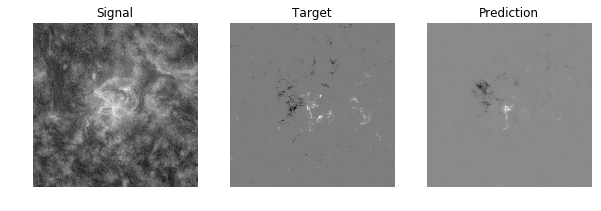

In [21]:
#examples (SameAR)
imgnums=random.sample(range(len(prediction_list)), 5)
for n in imgnums:
    target = target_list[n]
    signal = signal_list[n]
    prediction = prediction_list[n]
    
    plot = r.display(signal, target, prediction)

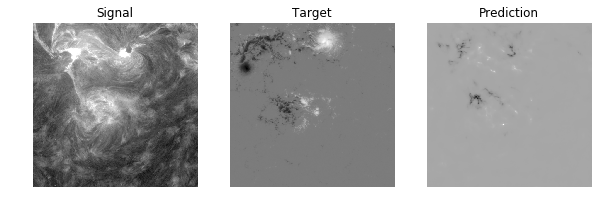

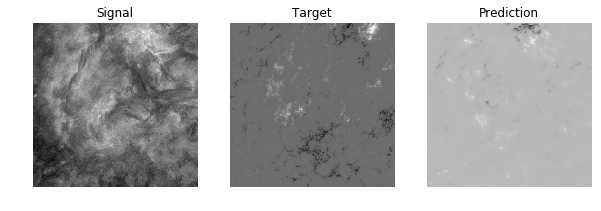

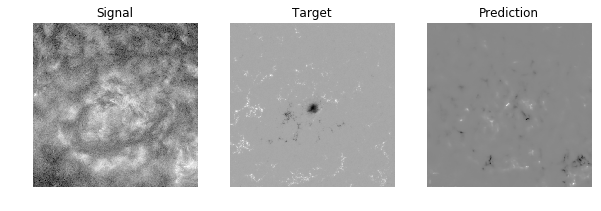

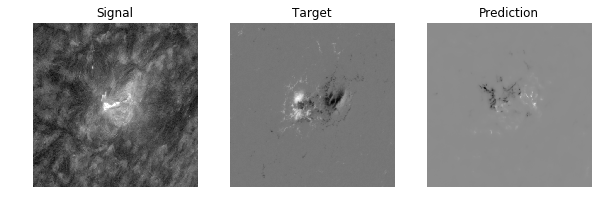

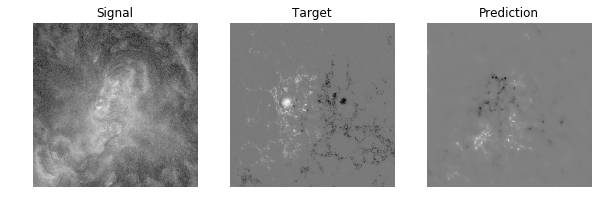

In [22]:
#examples (DiffAR)
imgnums=random.sample(range(len(prediction_list)), 5)
for n in imgnums:    
    target = target_list_new[n]
    signal = signal_list_new[n]
    prediction = prediction_list_new[n]
    plot = r.display(signal, target, prediction)

# 52 AR, balanced signed HMI

### log10 AIA

In [11]:
model_name='52log10rotate'
signal_list, target_list, prediction_list, signal_list_new, target_list_new, prediction_list_new = setup(model_name)

500
500


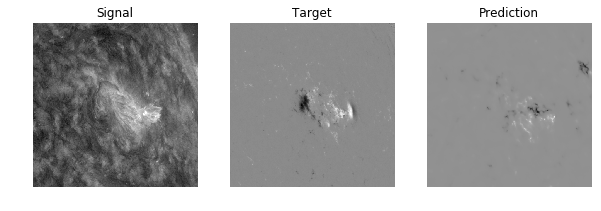

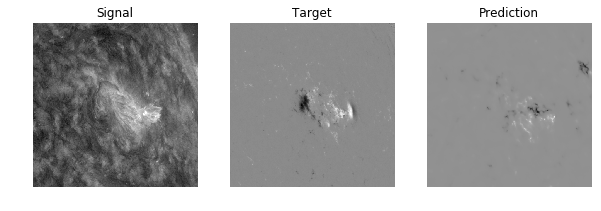

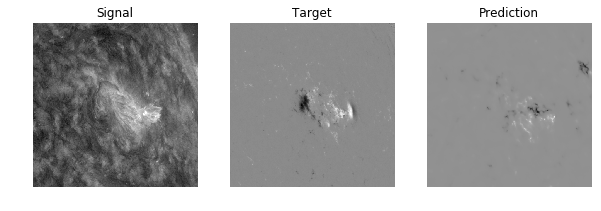

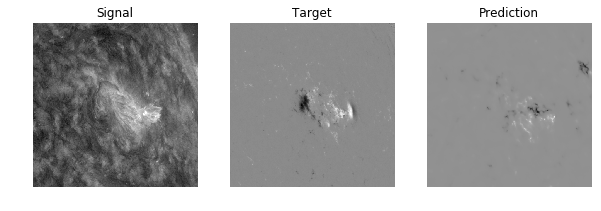

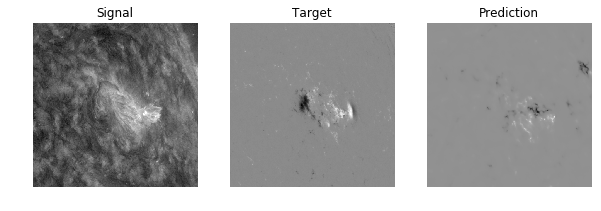

In [13]:
#examples (SameAR)
imgnums=random.sample(range(len(prediction_list)), 5)
for n in imgnums:
    target = target_list[n]
    signal = signal_list[n]
    prediction = prediction_list[n]
    
    plot = r.display(signal, target, prediction)

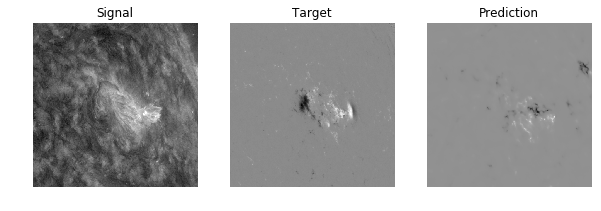

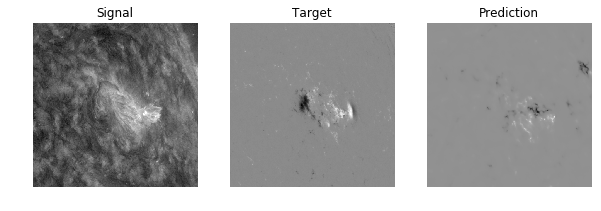

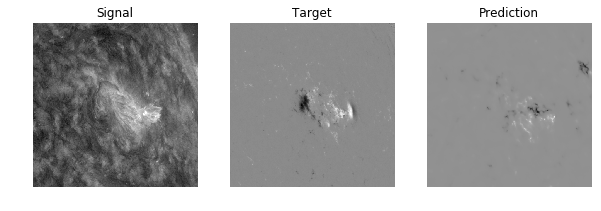

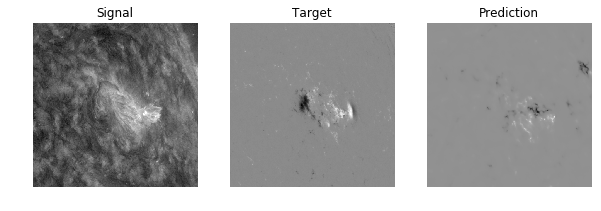

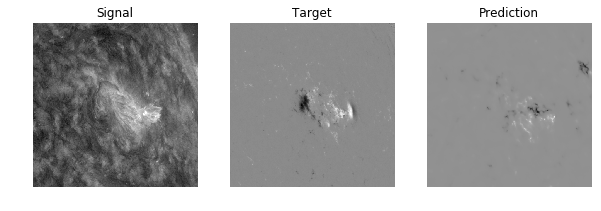

In [14]:
#examples (DiffAR)
imgnums=random.sample(range(len(prediction_list)), 5)
for n in imgnums:    
    target = target_list_new[n]
    signal = signal_list_new[n]
    prediction = prediction_list_new[n]
    plot = r.display(signal, target, prediction)

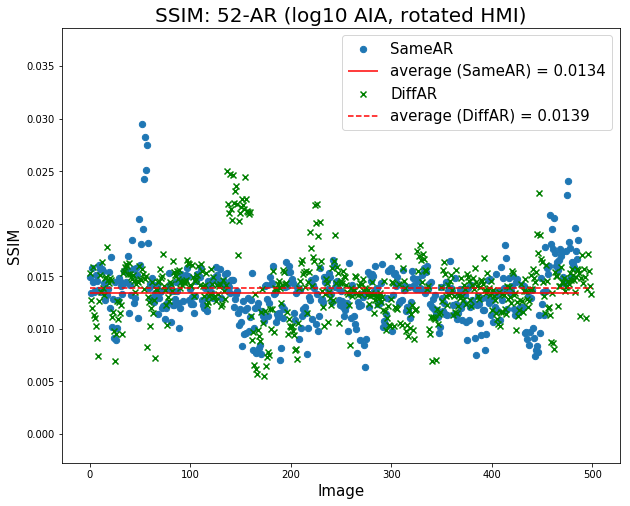

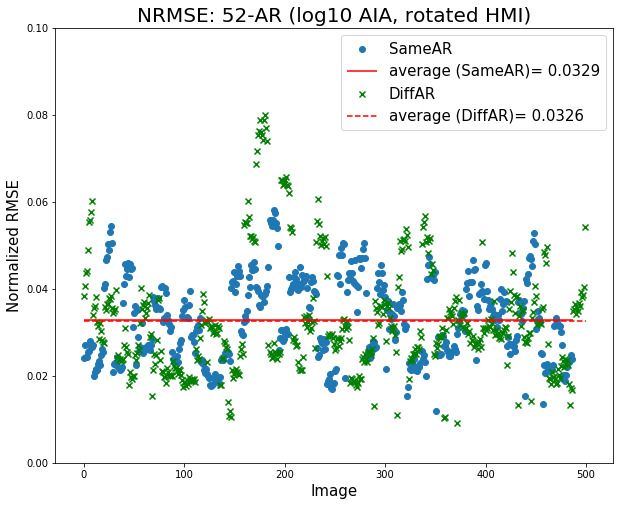

In [18]:
og_csv1='/home/zenalisa/data/50ar_last/test_list_50ar_last_log10rotate.csv'
og_csv2='/home/zenalisa/data/50ar/test_list_50ar_last_new_log10rotate.csv'

sname='52-AR (log10 AIA, rotated HMI)'
[ssim_neither, mse_neither, ssim_neither_new, mse_neither_new]=r.ssim_mse(target_list, prediction_list, og_csv1, target_list_new, prediction_list_new, og_csv2, simname=sname)


### Linear AIA

In [33]:
model_name='52linrotate'
signal_list, target_list, prediction_list, signal_list_new, target_list_new, prediction_list_new = setup(model_name)

500
500


[274, 246, 461, 297, 309]


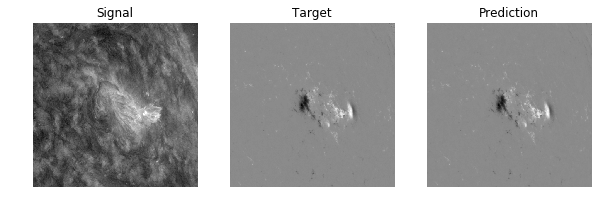

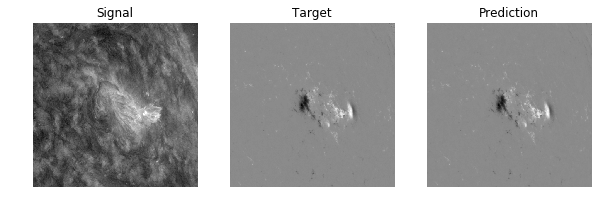

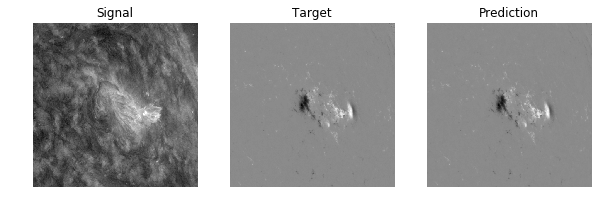

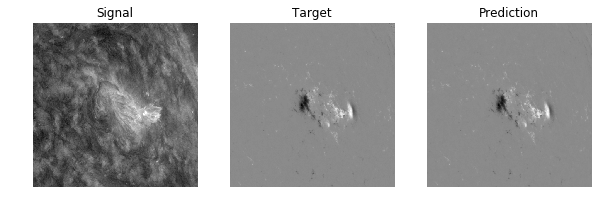

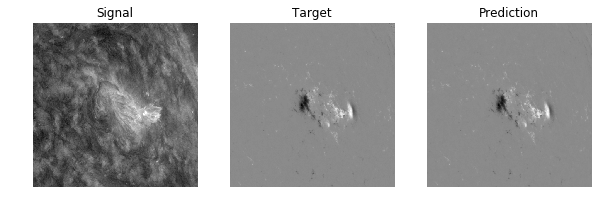

In [34]:
#examples (SameAR)
imgnums=random.sample(range(len(prediction_list)), 5)
print(imgnums)
for n in imgnums:
    target = target_list[n]
    signal = signal_list[n]
    prediction = prediction_list[n]
    p=np.array(Image.open(prediction))

    
    plot = r.display(signal, target, prediction)

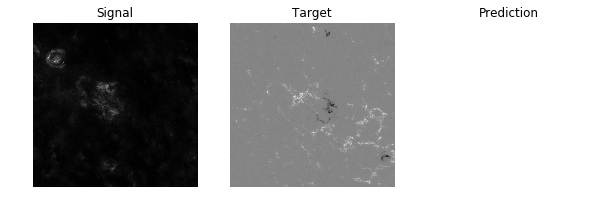

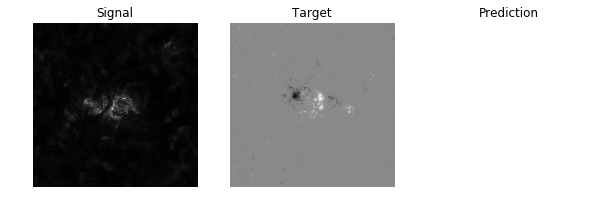

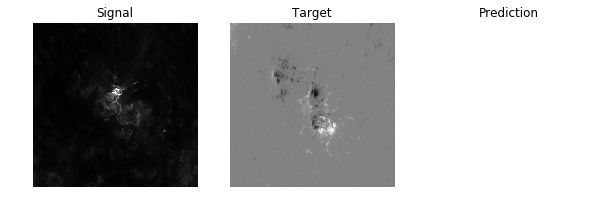

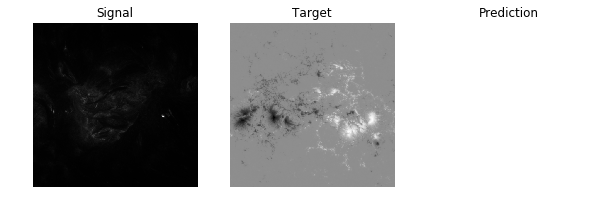

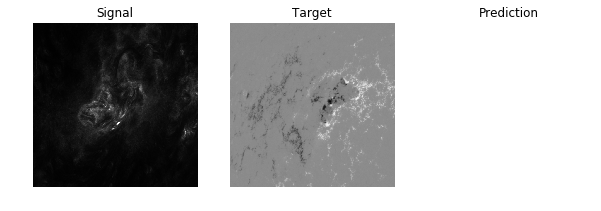

In [21]:
#examples (DiffAR)
imgnums=random.sample(range(len(prediction_list)), 5)
for n in imgnums:    
    target = target_list_new[n]
    signal = signal_list_new[n]
    prediction = prediction_list_new[n]
    plot = r.display(signal, target, prediction)

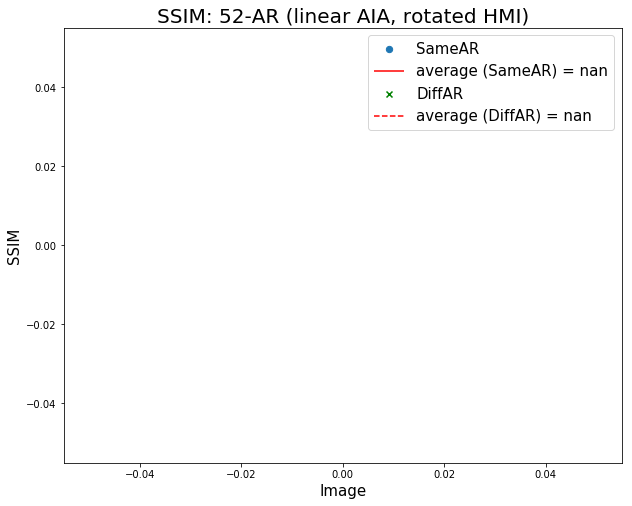

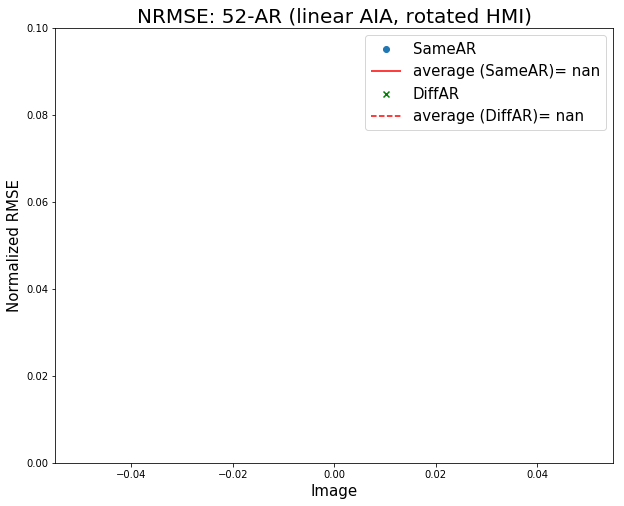

In [22]:
og_csv1='/home/zenalisa/data/50ar_last/test_list_50ar_last_linrotate.csv'
og_csv2='/home/zenalisa/data/50ar/test_list_50ar_last_new_linrotate.csv'

sname='52-AR (linear AIA, rotated HMI)'
[ssim_neither, mse_neither, ssim_neither_new, mse_neither_new]=r.ssim_mse(target_list, prediction_list, og_csv1, target_list_new, prediction_list_new, og_csv2, simname=sname)


# 1-hemisphere HMI

### log10 AIA

In [4]:
model_name='52log101hem'
signal_list, target_list, prediction_list, signal_list_new, target_list_new, prediction_list_new = setup(model_name)
x, y, z, signal_list3, target_list3, prediction_list3 = setup(model_name, south=True)

500
500
500
500


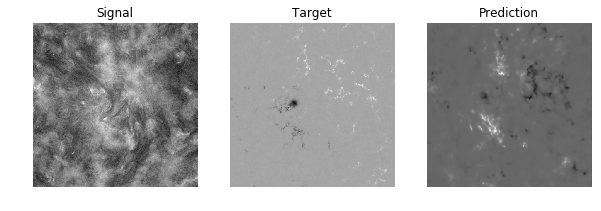

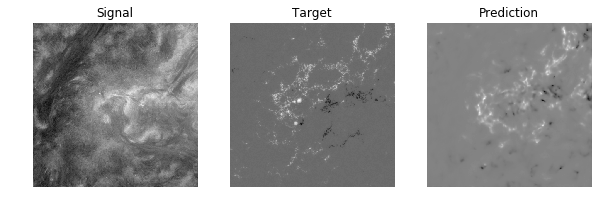

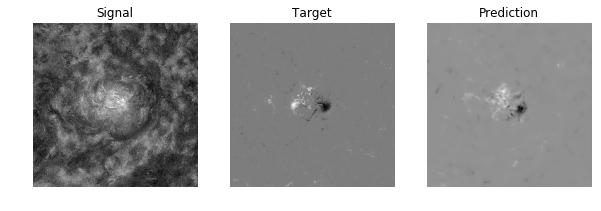

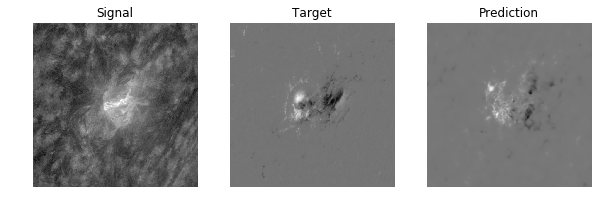

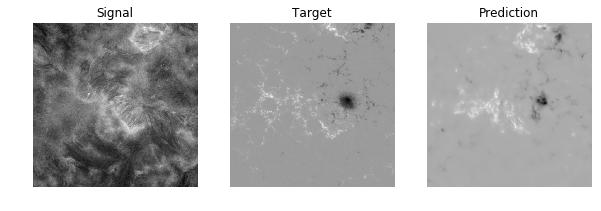

In [18]:
#examples (SameAR)
imgnums=random.sample(range(len(prediction_list)), 5)
for n in imgnums:
    target = target_list[n]
    signal = signal_list[n]
    prediction = prediction_list[n]
    
    plot = r.display(signal, target, prediction)#, '/home/zenalisa/data/fixed_aia_lists/test_list_1hem_210318log10.csv')#, norm=True)
    #break

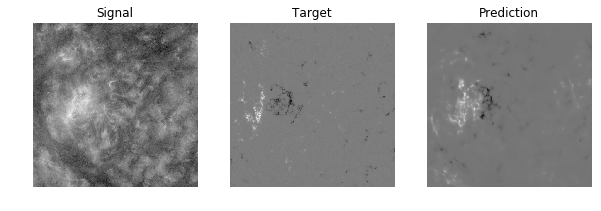

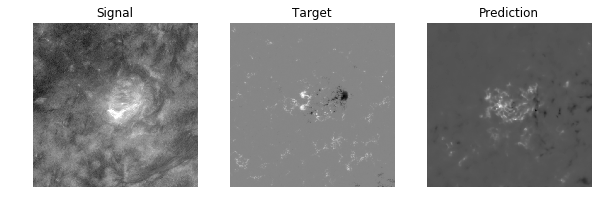

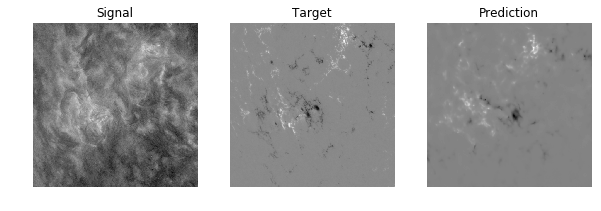

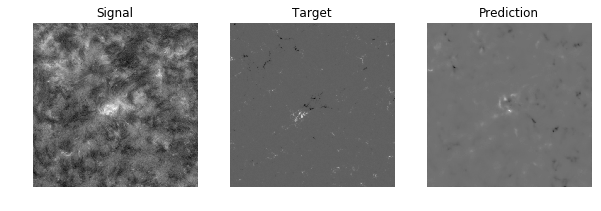

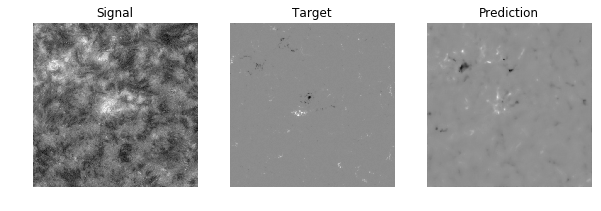

In [26]:
#examples (DiffAR)
imgnums=random.sample(range(len(prediction_list)), 5)
for n in imgnums:    
    target = target_list_new[n]
    signal = signal_list_new[n]
    prediction = prediction_list_new[n]
    plot = r.display(signal, target, prediction)

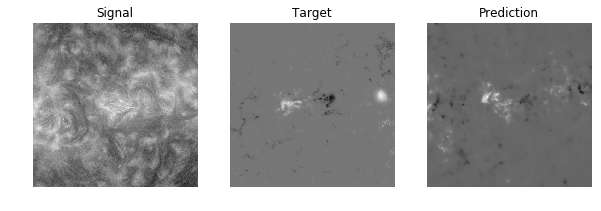

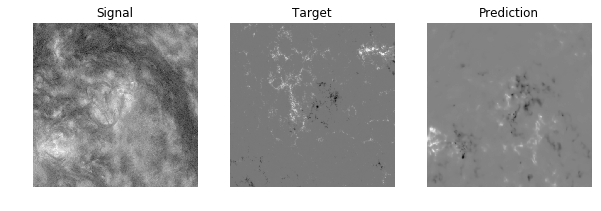

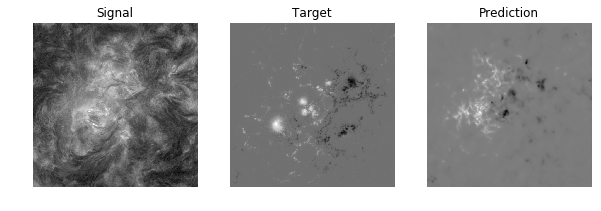

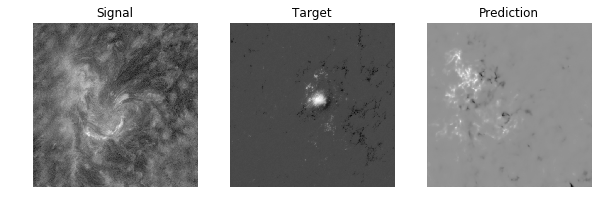

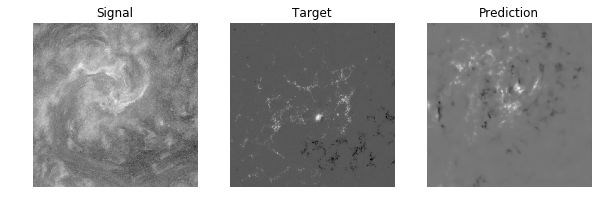

In [8]:
#examples (SouthAR)
imgnums=random.sample(range(len(prediction_list3)), 5)
for n in imgnums:    
    #print(target_list3[n])
    target = target_list3[n]
    signal = signal_list3[n]
    prediction = prediction_list3[n]
    plot = r.display(signal, target, prediction)

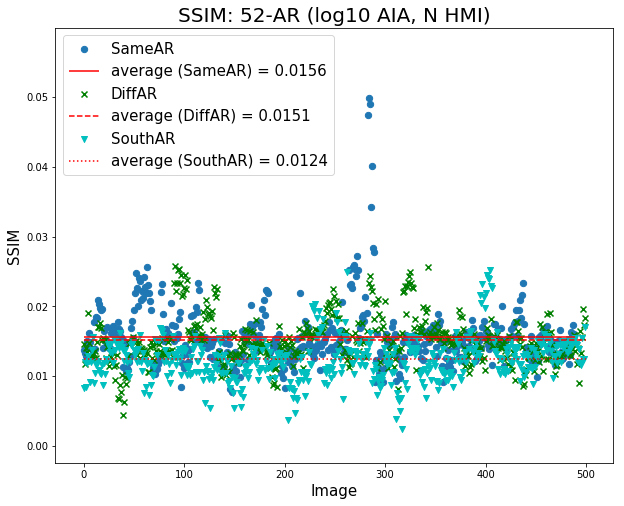

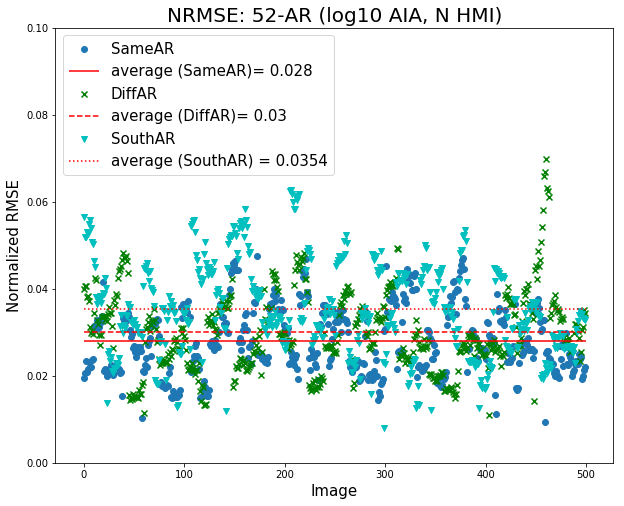

In [10]:
og_csv1='/home/zenalisa/data/1hem_last/lists/test_list_1hem_last_log10signed.csv'
og_csv2='/home/zenalisa/data/1hem_last/lists/test_list_1hem_last_new_log10signed.csv'
og_csv3='/home/zenalisa/data/1hem_last/south_only_good/test_list_1hem_last_south_log10signed.csv'

sname='52-AR (log10 AIA, N HMI)'
[ssim_log10, mse_log10, ssim_log10_new, mse_log10_new]=r.ssim_mse(target_list, prediction_list, og_csv1, target_list_new, prediction_list_new, og_csv2, target_list3=target_list3, prediction_list3=prediction_list3, og_target_csv3=og_csv3, simname=sname)


### linear AIA

In [3]:
model_name='52lin1hem'
signal_list, target_list, prediction_list, signal_list_new, target_list_new, prediction_list_new = setup(model_name)
x, y, z, signal_list3, target_list3, prediction_list3 = setup(model_name, south=True)

500
496
500
500


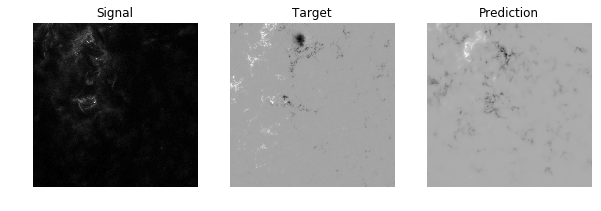

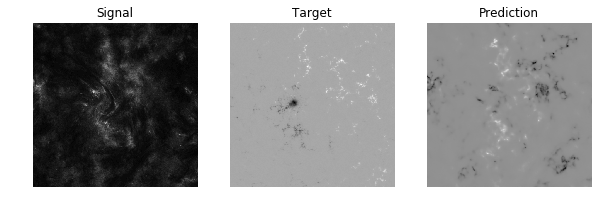

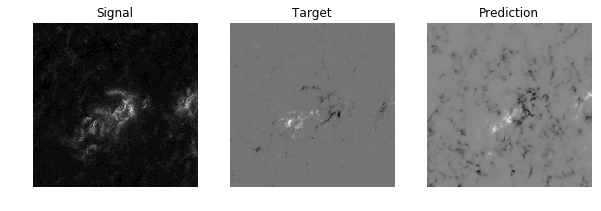

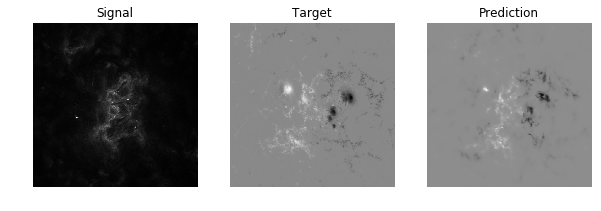

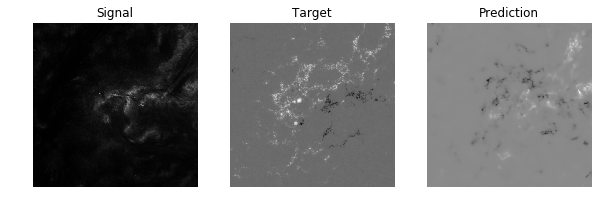

In [19]:
#examples (SameAR)
imgnums=random.sample(range(len(prediction_list)), 5)
for n in imgnums:
    target = target_list[n]
    signal = signal_list[n]
    prediction = prediction_list[n]
    
    plot = r.display(signal, target, prediction)

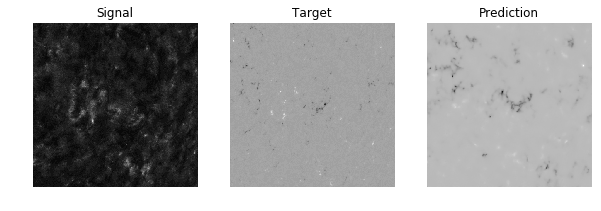

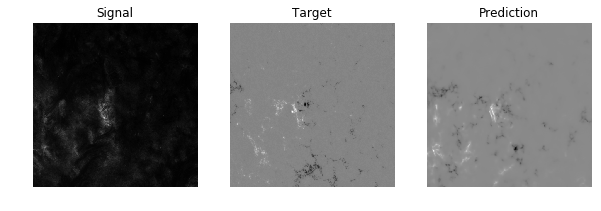

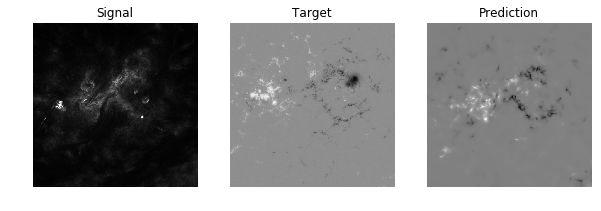

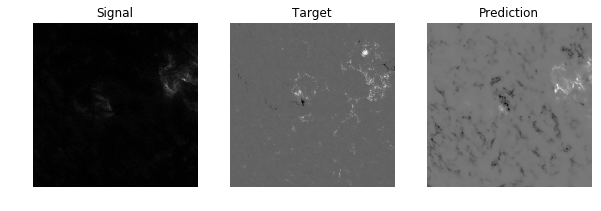

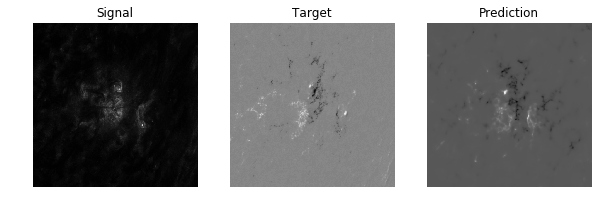

In [12]:
#examples (DiffAR)
imgnums=random.sample(range(len(prediction_list)), 5)
for n in imgnums:    
    target = target_list_new[n]
    signal = signal_list_new[n]
    prediction = prediction_list_new[n]
    plot = r.display(signal, target, prediction)

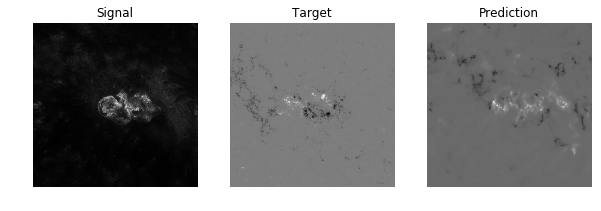

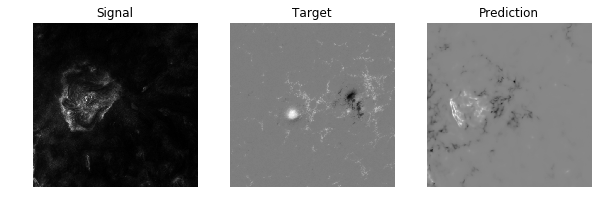

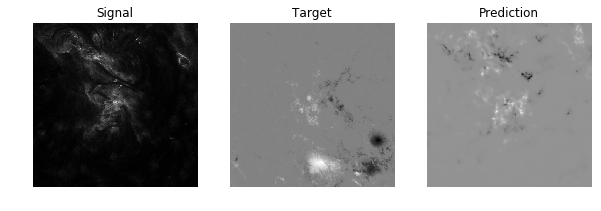

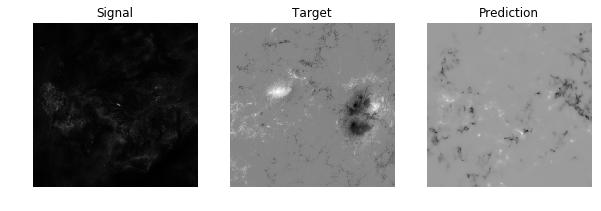

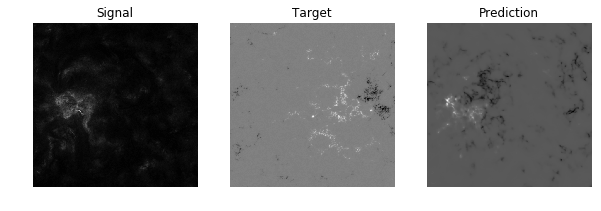

In [25]:
#examples (SouthAR)
imgnums=random.sample(range(len(prediction_list3)), 5)
for n in imgnums:    
    target = target_list3[n]
    signal = signal_list3[n]
    prediction = prediction_list3[n]
    plot = r.display(signal, target, prediction)

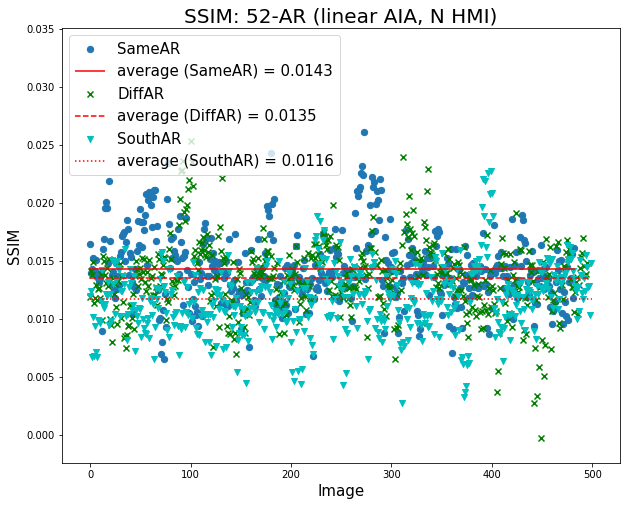

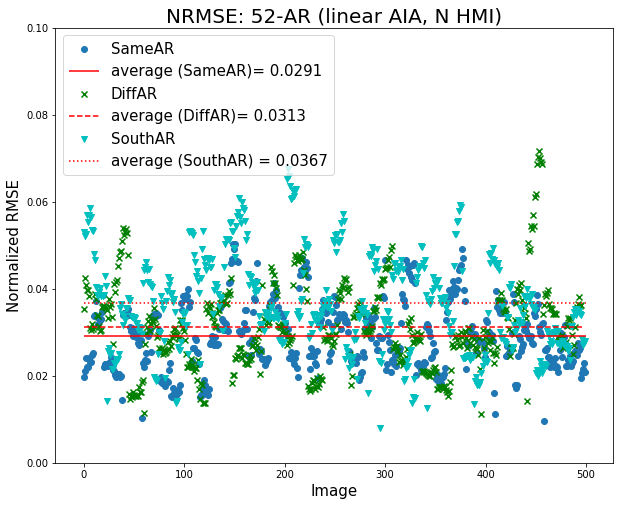

In [4]:
og_csv1='/home/zenalisa/data/1hem_last/lists/test_list_1hem_last_linsigned.csv'
og_csv2='/home/zenalisa/data/1hem_last/lists/test_list_1hem_last_new_linsigned.csv'
og_csv3='/home/zenalisa/data/1hem_last/south_only_good/test_list_1hem_last_south_linsigned.csv'

sname='52-AR (linear AIA, N HMI)'
[ssim_log10, mse_log10, ssim_log10_new, mse_log10_new]=r.ssim_mse(target_list, prediction_list, og_csv1, target_list_new, prediction_list_new, og_csv2, target_list3=target_list3, prediction_list3=prediction_list3, og_target_csv3=og_csv3, simname=sname)
